In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff, expand
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Метод на най-малките квадрати - част 1

### Задача 1
Да се намери линейна функция, която приближава по метода на най-малките квадрати данните от таблицата

|x| 0 | 1 | 2 | 3 | 4
|---|---|---|---|---|---|
|y|0|1|1|2|2|

In [15]:
xs = np.array([0, 1, 2, 3, 4])
ys = np.array([0,1,1,2,2])

a, b = symbols('a, b')

def f(x, params):
    a, b = params
    return a * x + b

In [17]:
phi = 0;

for i in range(xs.size):
    phi += (f(xs[i], (a,b)) - ys[i])** 2

expand(phi)

30*a**2 + 20*a*b - 34*a + 5*b**2 - 12*b + 10

In [19]:
sol = solve([Eq(diff(phi, a), 0),
 Eq(diff(phi, b), 0)
])

sol

{a: 1/2, b: 1/5}

In [21]:
f(0.1, (sol[a], sol[b]))

0.250000000000000

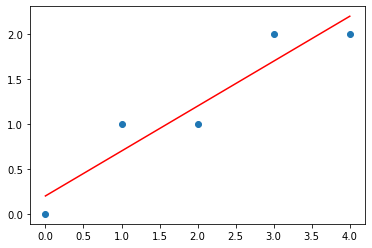

In [23]:
x_axis = np.linspace(0, 4, 100)
plt.plot(x_axis, f(x_axis, (sol[a], sol[b])), color = 'red')
plt.scatter(xs, ys)
plt.show()

### Задача 2

Във файла *CO_2_data.csv* се съдръжат данни за нивата на въглеродния диоксид в атмосферата (в млрд. тонове) за периода 1940-2022г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи линейна функция, която приближава данните.

*Източник: https://www.statista.com/statistics/276629/global-co2-emissions/*

In [4]:
df = pd.read_csv('CO_2_data.csv')#data frame type

df.head()

,year,co2
0,1940,4.85
1,1941,4.97
2,1942,4.95
3,1943,5.04
4,1944,5.11


In [27]:
years = df.loc[:, 'year']
co2 = df.loc[:, 'co2']

#another way
#xs = np.array(df['year'])
#ys = np.array(df['co2'])

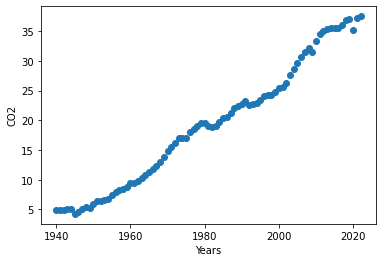

In [29]:
plt.scatter(years, co2)
plt.xlabel('Years')
plt.ylabel('CO2')
plt.show()

In [31]:
a,b = symbols('a, b')

def f(x, a, b):
    return a * x + b

In [33]:
def phi(a,b):
    phi = 0
    for i in range(years.size):
        phi += (f(years[i], a,b) - co2[i]) ** 2
    return phi

In [35]:
equations = [Eq(diff(phi(a, b), a), 0),
             Eq(diff(phi(a, b), b), 0)]

sol = solve(equations)

sol

{a: 0.430363124973763, b: -833.280314428446}

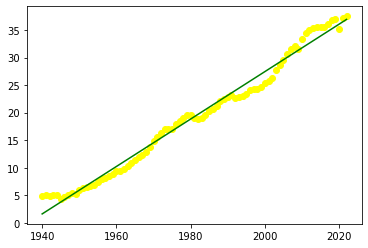

In [37]:
x_axis = np.linspace(years[0], years[years.size - 1], 1000)
plt.scatter(years, co2, color = 'yellow')
plt.plot(x_axis, f(x_axis, sol[a], sol[b]), color = 'green')
plt.show()

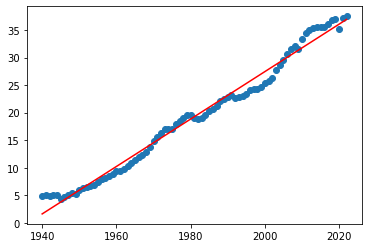

In [39]:
#another way

xs = np.array(df['year'])
ys = np.array(df['co2'])

def f(x, params):
    a,b = params
    return a* x + b

phi = 0
for i in range(xs.size):
    phi += (f(xs[i], (a,b)) - ys[i])** 2

expand(phi)

sol = solve([Eq(diff(phi, a), 0),
            Eq(diff(phi, b), 0)])

sol

x_axis = np.linspace(xs[0], xs[xs.size - 1], 100)
plt.plot(x_axis, f(x_axis, (sol[a], sol[b])), color = 'red')
plt.scatter(xs, ys)
plt.show()

### Задача 3

Известно е, че връзката между скоростта на вятъра и генерираното количество електроенергия от една вятърна турбина може да се опише чрез кубична функция.
Във файла *wind_turbine_data_sample.csv* се съдръжат измервания за количеството прозиведена електроенергия (kW) от конкретен вятърен генератор в зависимост от скоростта на вятъра (m/s).
Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи полином от трета степен, който приближава данните.

*Източник: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset/*

In [91]:
wind_df = pd.read_csv('wind_turbine_data_sample.csv')
wind_df.head()

,wind speed,power output
0,5.096144,553.564270
1,6.609746,698.286377
2,7.464809,1240.730957
3,6.646651,834.204285
4,5.611550,461.315887


In [93]:
wind_speed = wind_df.loc[ : , 'wind speed']
power_output = wind_df.loc[ : , 'power output']
n = wind_speed.size
a, b, c, d = symbols('a, b, c, d')

In [95]:
def wind(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

In [97]:
def phi(n, wind_speed, power_output, a, b, c, d):
    phi = 0
    for i in range(n):
        phi += ((wind(wind_speed[i], a, b, c, d) - power_output[i]) ** 2)
    return phi

In [99]:
equations = [Eq(diff(phi(n, wind_speed, power_output, a, b, c, d), a), 0),
          Eq(diff(phi(n, wind_speed, power_output, a, b, c, d), b), 0),
           Eq(diff(phi(n, wind_speed, power_output, a, b, c, d), c), 0),
            Eq(diff(phi(n, wind_speed, power_output, a, b, c, d), d), 0)]

sol = solve(equations)
sol

{a: -7.59606064982793,
 b: 205.917112180286,
 c: -1334.75406713179,
 d: 2787.95787856771}

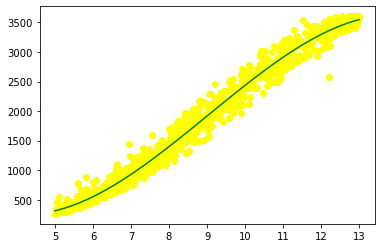

In [126]:
x_axis = np.linspace(5, 13, 100)
plt.scatter(wind_speed, power_output, color = 'yellow')
plt.plot(x_axis, 
         wind(x_axis, sol[a], sol[b], sol[c], sol[d]),
         color = 'green')
plt.show()

In [ ]:
#another way

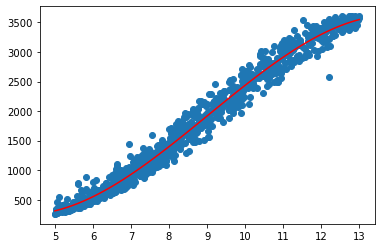

In [131]:
wind_df = pd.read_csv('wind_turbine_data_sample.csv')

xs = np.array(wind_df['wind speed'])
ys = np.array(wind_df['power output'])

a, b, c, d = symbols('a,b,c,d')

def wind(x, params):
    a, b, c, d = params
    return a * x ** 3 + b * x ** 2 + c * x + d

phi = 0 
for i in range(xs.size):
    phi += (wind(xs[i], (a,b,c,d)) - ys[i]) ** 2

expand(phi)

sol = solve([Eq(diff(phi , a), 0),
             Eq(diff(phi, b), 0),
            Eq(diff(phi, c) , 0),
            Eq(diff(phi, d), 0)
            ])
sol

x_axis = np.linspace(5, 13, 100)
plt.plot(x_axis, wind(x_axis, (sol[a], sol[b], sol[c], sol[d])), color = 'red')
plt.scatter(xs, ys)
plt.show()

### Задача 4

Във файла *amazon_sales_net_revenue.csv* се съдръжат данни за годишния приход на Amazon в млрд. щатски долари за периода 2004 - 2021г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати, да се построи функция от вида $ f(x) = a e^{bx}$, която моделира данните.


*Източник: https://www.statista.com/statistics/266282/annual-net-revenue-of-amazoncom/*

In [134]:
amazon_df = pd.read_csv('amazon_sales_net_revenue.csv')
amazon_df.head()

,year,revenue
0,2004,6.92
1,2005,8.49
2,2006,10.71
3,2007,14.84
4,2008,19.17


In [165]:
years = amazon_df.loc[:, 'year']
revenue = amazon_df.loc[:, 'revenue']
size = years.size
c,b = symbols('c, b')

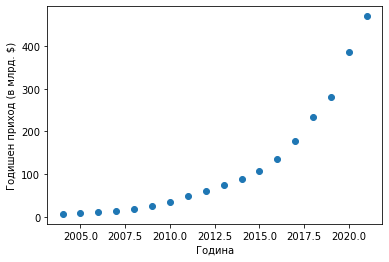

In [167]:
plt.scatter(years, revenue)
plt.xlabel('Година')
plt.ylabel('Годишен приход (в млрд. $)')
plt.show()

In [193]:
def amazon(c, b, x):
    return b * x + c

def phi(c, b):
    sum_of_squares = 0
    for i in range(size):
        sum_of_squares += (amazon(c, b, years[i]) - np.log(revenue[i])) ** 2
    return sum_of_squares

In [195]:
equations = [Eq(diff(phi(c, b), b), 0),
             Eq(diff(phi(c, b), c), 0)]

sol = solve(equations)
print(sol)

{b: 0.249215934116305, c: -497.459709696735}


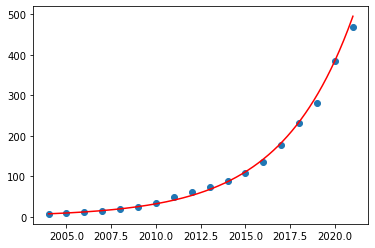

In [206]:
def expr_func(x):
    return np.exp(float(sol[c]) + float(sol[b]) * x)

x_axis = np.linspace(years[0], years[size - 1], 1000)
plt.scatter(years, revenue)
plt.plot(x_axis, expr_func(x_axis), color = 'red')
plt.show()

In [ ]:
#moodle way

In [14]:
df = pd.read_csv('amazon_sales_net_revenue.csv')
years = df.loc[:, "year"]
revenue = df.loc[:, "revenue"]

In [16]:
c, b = symbols('c, b')
def f(c, b, x):
    return c * x + b

def phi(c, b):
    sum_of_squares = 0
    for i in range(years.size):
        sum_of_squares += (f(c, b, years[i]) - np.log(revenue[i])) ** 2
    return sum_of_squares

equations = [Eq(diff(phi(c, b), b), 0),
             Eq(diff(phi(c, b), c), 0)]

sol = solve(equations)
print(sol)

{b: -497.459709696735, c: 0.249215934116305}


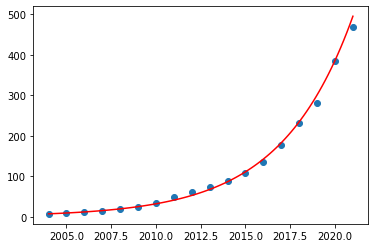

In [18]:
def exp_func(x):
    return np.exp(float(sol[c]) * x + float(sol[b]))

x_axis = np.linspace(2004, 2021, 100)
plt.scatter(years, revenue)
plt.plot(x_axis, exp_func(x_axis), 'red')
plt.show()